Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Load wavelenght and counts data from .txt file

In [2]:
data = np.genfromtxt("20x20um40x40p_mapa4.txt", delimiter=";",skip_header=38)
wl = data[:,0]
data = data[:,1:-1]

Load spectral background data from .txt file

In [3]:
backgr = np.genfromtxt("Spectra_background_1s.txt",delimiter=";",skip_header=37) # tengo un solo punto por eso no son 1600 columnas, solo 40 de una linea del mapa cuando tiene 2 dimensiones
backgr_sel= backgr[832:879, 1:]

Select rows from data corresponding to fluorophore emission wavelenght

In [4]:
data_sel = data[832:879, :]

Data normalization

In [5]:
norm_lmean = data_sel / backgr_sel

Mean and std deviation calculations on columns

In [6]:
lmean = np.mean(norm_lmean, axis=0)
lmean

array([1.60968555, 1.55110779, 1.53476855, ..., 1.63245789, 1.6412951 ,
       1.67415741])

In [7]:
lstd = np.std(norm_lmean, axis=0)
lstd

array([0.0478123 , 0.04640781, 0.05332118, ..., 0.04695528, 0.04583733,
       0.04276111])

Reshape to a representative bidimentional array

In [8]:
lmean2d = np.reshape(lmean,(40,40))
lmean2d

array([[1.60968555, 1.55110779, 1.53476855, ..., 1.58560345, 1.6222536 ,
        1.65609422],
       [1.4931888 , 1.45200023, 1.43970647, ..., 1.53385728, 1.58706785,
        1.63555884],
       [1.46122609, 1.40870491, 1.39696341, ..., 1.48422935, 1.53833811,
        1.6140813 ],
       ...,
       [1.47224929, 1.45778375, 1.47070358, ..., 1.64405986, 1.63766042,
        1.6551832 ],
       [1.48549802, 1.45920476, 1.45837061, ..., 1.63966971, 1.6473586 ,
        1.66857098],
       [1.47217338, 1.45240796, 1.44343664, ..., 1.63245789, 1.6412951 ,
        1.67415741]])

In [9]:
lstd2d = np.reshape(lstd,(40,40))
lstd2d

array([[0.0478123 , 0.04640781, 0.05332118, ..., 0.05191927, 0.04751767,
        0.04794211],
       [0.05067363, 0.03773118, 0.03691461, ..., 0.04116344, 0.04419159,
        0.04615247],
       [0.04407369, 0.04381111, 0.0344546 , ..., 0.04496945, 0.04648152,
        0.04742771],
       ...,
       [0.04408236, 0.03874084, 0.03437448, ..., 0.04509068, 0.0465078 ,
        0.0447388 ],
       [0.05884249, 0.04407725, 0.03906284, ..., 0.04403396, 0.03609369,
        0.0421411 ],
       [0.04138208, 0.03517259, 0.0404621 , ..., 0.04695528, 0.04583733,
        0.04276111]])

Plot as colormap

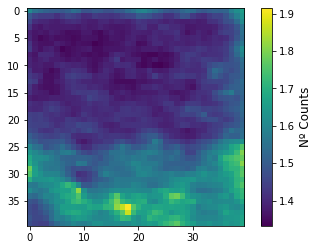

In [10]:
plt.imshow(lmean2d)
barra1 = plt.colorbar()
barra1.set_label('Nº Counts', fontsize=12)
plt.show() 

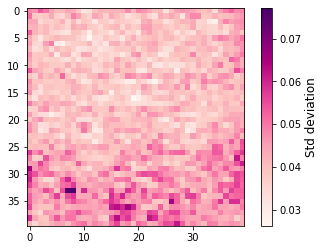

In [11]:
plt.imshow(lstd2d, cmap="RdPu")
barra2 = plt.colorbar()
barra2.set_label('Std deviation', fontsize=12)
plt.show() 